In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('BIKE DETAILS.csv')

In [31]:
data.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [32]:
data.shape

(1061, 7)

In [33]:
 data.isnull().sum()
 #ex_showroom_price has loads of missing data that needs to be handeled 

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

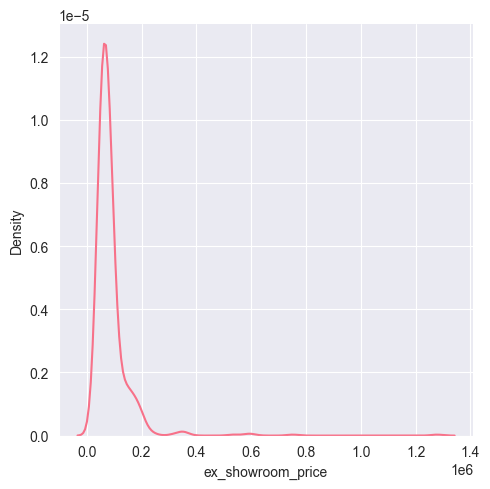

In [34]:
#distribution before filling nans 
handeled_data=data
#distribution before filling nans 
sns.set_palette("husl")
sns.displot(data=handeled_data, x="ex_showroom_price", kind="kde")


In [35]:
#filling the nans 
handeled_data["ex_showroom_price"].fillna(handeled_data["ex_showroom_price"].median(), inplace=True)

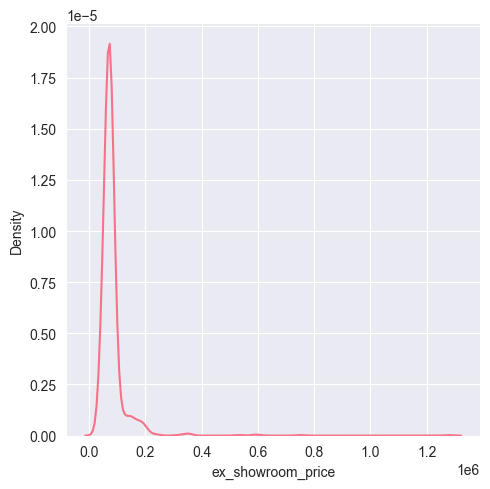

In [36]:
#distribution after filling nans 
sns.set_palette("husl")
sns.displot(data=handeled_data, x="ex_showroom_price", kind="kde")

In [37]:
data.info()
#seller-type/owner/name these needs categorical encoding 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  1061 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [38]:
#seller_type
print((data['seller_type']).unique())  

['Individual' 'Dealer']


In [39]:
#seller_type has two categories only (numeric encoding )
handeled_data=data.replace({'seller_type':{'Individual':0,'Dealer':1}})

In [40]:
#owner
print((data['owner']).unique()) 

['1st owner' '2nd owner' '3rd owner' '4th owner']


In [41]:
#owner has 4 categories (ordinal data so better go for numeric encoding)
# 1. 
ownerDict =   {   '1st owner':1,
                   '2nd owner':2,
                   '3rd owner':3,  
                   '4th owner':4,            
                }
# 2. 
handeled_data['Ordinal_owners'] = handeled_data.owner.map(ownerDict)
handeled_data[['Ordinal_owners']].head()
# 3.
handeled_data_sec = handeled_data.drop('owner', axis = 1)

In [42]:
#name
print((data['name']).unique())

['Royal Enfield Classic 350' 'Honda Dio'
 'Royal Enfield Classic Gunmetal Grey' 'Yamaha Fazer FI V 2.0 [2016-2018]'
 'Yamaha SZ [2013-2014]' 'Honda CB Twister' 'Honda CB Hornet 160R'
 'Royal Enfield Bullet 350 [2007-2011]' 'Hero Honda CBZ extreme'
 'Bajaj Discover 125' 'Yamaha FZ16' 'Honda Navi'
 'Bajaj Avenger Street 220' 'Yamaha YZF R3' 'Jawa 42'
 'Suzuki Access 125 [2007-2016]' 'Hero Honda Glamour' 'Yamaha YZF R15 S'
 'Yamaha FZ25' 'Hero Passion Pro 110' 'Honda Navi [2016-2017]'
 'Honda Activa i' 'Jawa Standard' 'Royal Enfield Thunderbird 350'
 'Honda Dream Yuga' 'TVS Apache RTR 160 4V' 'Yamaha Fazer [2009-2016]'
 'Hero Honda Splendor NXG' 'Hero Glamour 125' 'Yamaha FZ S [2012-2016]'
 'Hero Xtreme Sports' 'Honda X-Blade' 'Honda CB Shine SP'
 'Honda Activa 5G' 'Honda CBR-250R' 'Hero Honda Passion PRO [2012]'
 'Bajaj Dominar 400' 'Hero Glamour FI' 'KTM 390 Duke' 'Hero Passion XPro'
 'Yamaha FZ S V 2.0' 'Hero Achiever 150' 'Yamaha Saluto'
 'Bajaj Discover 100' 'Honda CB Trigger' 'Royal

In [43]:
# contain diff categories so it needs one hot encoding 
handeled_data_sec=pd.get_dummies(handeled_data_sec)
#handeled_data.dtypes

In [44]:
handeled_data_sec.head()

,selling_price,year,seller_type,km_driven,ex_showroom_price,Ordinal_owners,name_Activa 3g,name_Activa 4g,name_Aprilia SR 125,name_BMW G310GS,...,name_Yamaha SZ [2013-2014],name_Yamaha SZ-S,name_Yamaha Saluto,name_Yamaha Saluto RX,name_Yamaha YBR 125,name_Yamaha YZF R15 S,name_Yamaha YZF R15 V3,name_Yamaha YZF R15 [2011-2018],name_Yamaha YZF R3,name_Yo Style
0,175000,2019,0,350,72752.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45000,2017,0,5650,72752.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,150000,2018,0,12000,148114.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,65000,2015,0,23000,89643.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20000,2011,0,21000,72752.5,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [45]:
#checking outliers
handeled_data.describe()
#seems like all attributes got outlier but 'year' is best 

,selling_price,year,seller_type,km_driven,ex_showroom_price,Ordinal_owners
count,1061.000000,1061.000000,1061.000000,1061.000000,1.061000e+03,1061.000000
mean,59638.151744,2013.867107,0.005655,34359.833176,8.172431e+04,1.145146
std,56304.291973,4.301191,0.075022,51623.152702,5.997579e+04,0.402407
min,5000.000000,1988.000000,0.000000,350.000000,3.049000e+04,1.000000
25%,28000.000000,2011.000000,0.000000,13500.000000,6.458900e+04,1.000000
50%,45000.000000,2015.000000,0.000000,25000.000000,7.275250e+04,1.000000
75%,70000.000000,2017.000000,0.000000,43000.000000,7.851300e+04,1.000000
max,760000.000000,2020.000000,1.000000,880000.000000,1.278000e+06,4.000000


In [46]:
df=handeled_data_sec
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

selling_price                      42000.0
year                                   6.0
seller_type                            0.0
km_driven                          29500.0
ex_showroom_price                  13924.0
                                    ...   
name_Yamaha YZF R15 S                  0.0
name_Yamaha YZF R15 V3                 0.0
name_Yamaha YZF R15 [2011-2018]        0.0
name_Yamaha YZF R3                     0.0
name_Yo Style                          0.0
Length: 285, dtype: float64


In [47]:
#df.drop(df[(df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))==1.0].index, inplace =True)
df2 =df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [48]:
print(df)

      selling_price  year  seller_type  km_driven  ex_showroom_price  \
0            175000  2019            0        350            72752.5   
1             45000  2017            0       5650            72752.5   
2            150000  2018            0      12000           148114.0   
3             65000  2015            0      23000            89643.0   
4             20000  2011            0      21000            72752.5   
...             ...   ...          ...        ...                ...   
1056          17000  2010            0     500000            52000.0   
1057          16000  2012            0      33000            51000.0   
1058          15000  2013            0      35000            57000.0   
1059          12000  2009            0      53000            58000.0   
1060          10000  2008            0      92233            75000.0   

      Ordinal_owners  name_Activa 3g  name_Activa 4g  name_Aprilia SR 125  \
0                  1               0               0      

In [49]:
#from sklearn.preprocessing import MinMaxScaler
# generate 1000 out_df points randomly drawn from an exponential distribution
#df = np.random.exponential(size = 1000).reshape(-1, 1)
#scaler = MinMaxScaler()
#scale the out_df between 0 and 1
#scaled_out_df = scaler.fit_transform(df)

In [50]:
#fig, ax=plt.subplots(1,2)
#sns.distplot(df, ax=ax[0])
#ax[0].set_title("df")
#sns.distplot(scaled_out_df, ax=ax[1])
#ax[1].set_title("Scaled out_df")

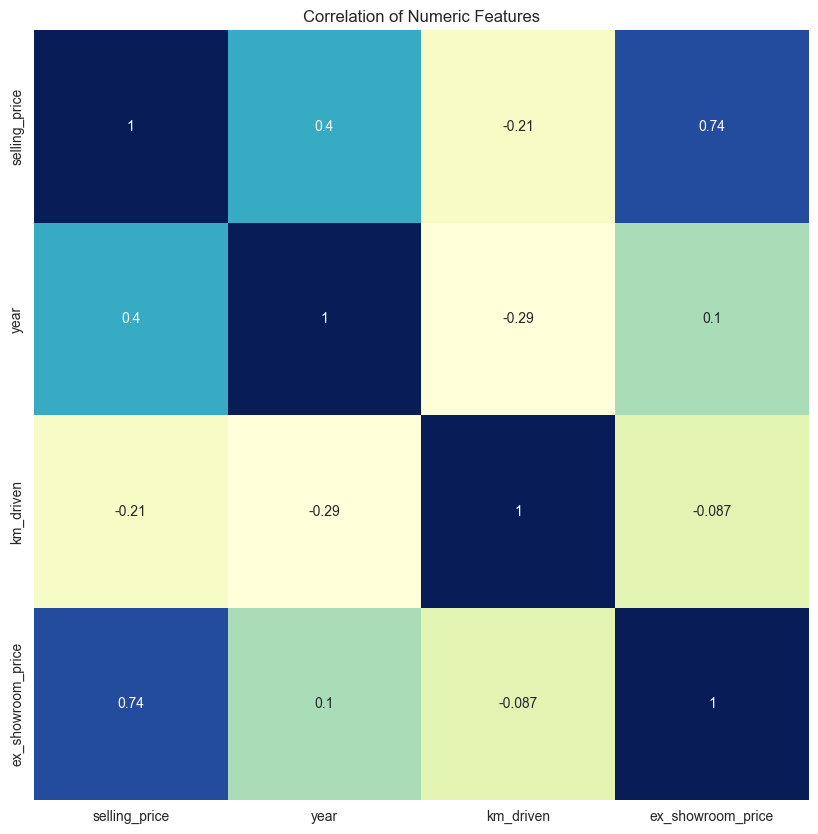

In [51]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.select_dtypes(np.number).corr(), 
            annot=True,
            cbar=False,
            cmap="YlGnBu",
            xticklabels=data.select_dtypes(np.number).columns,
            yticklabels=data.select_dtypes(np.number).columns)
plt.title('Correlation of Numeric Features')
plt.show()

In [52]:
df = pd.DataFrame(df) 

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

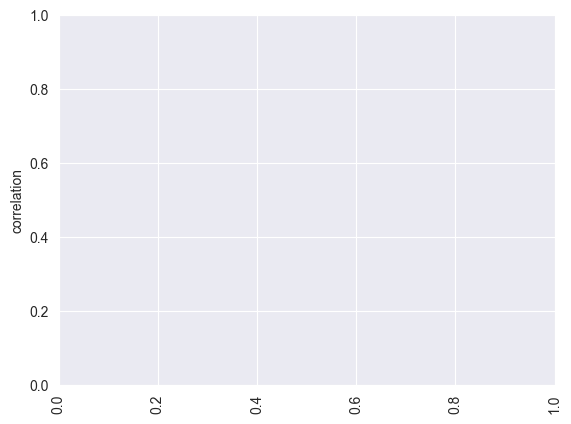

In [53]:
#df2 = df.loc[:,[1,3,4]]
df_new=df.loc[:, ["km_driven","selling_price"]]
cor = []
plt.figure()
for i in df2.columns:
    try:
        cor +=  [np.corrcoef(df2[i], df2['name'])[0][1]]
        plt.scatter(i, np.corrcoef(df2[i], df2['name'])[0][1])
        plt.axvline(x = i, color='k', linestyle='-',alpha=0.2)
    except:
        pass
plt.ylabel('correlation')
plt.xticks(rotation = 90)

In [54]:
df[['selling_price','km_driven']].corr()

,selling_price,km_driven
selling_price,1.000000,-0.212937
km_driven,-0.212937,1.000000


In [55]:
df3 = df[['ex_showroom_price','selling_price']]
df3.corr()

,ex_showroom_price,selling_price
ex_showroom_price,1.000000,0.744075
selling_price,0.744075,1.000000


In [56]:
df_trial=df[['km_driven', 'selling_price']].groupby('name')


KeyError: 'name'

In [61]:
data.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,72752.5
1,Honda Dio,45000,2017,Individual,1st owner,5650,72752.5
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,72752.5


In [64]:
np_data=np.array(data)
print(np_data.shape)
print(np_data[0])

(1061, 7)
['Royal Enfield Classic 350' 175000 2019 'Individual' '1st owner' 350
 72752.5]


In [65]:
X=np.append(np_data[:,1].reshape(-1,1),np_data[:,6].reshape(-1,1),axis=1)
print(X.shape)

(1061, 2)


In [66]:
y=np_data[:,1]
print(y.shape)

(1061,)


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred = regressor.predict(X_test)

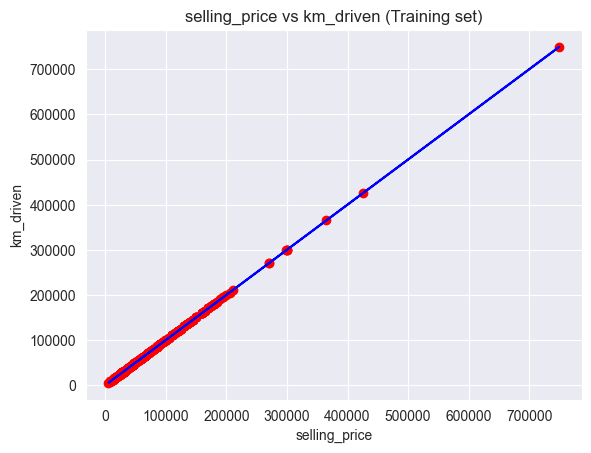

In [71]:
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train[:,0], regressor.predict(X_train), color = 'blue')
plt.title('selling_price vs km_driven (Training set)')
plt.xlabel('selling_price')
plt.ylabel('km_driven')
plt.show()

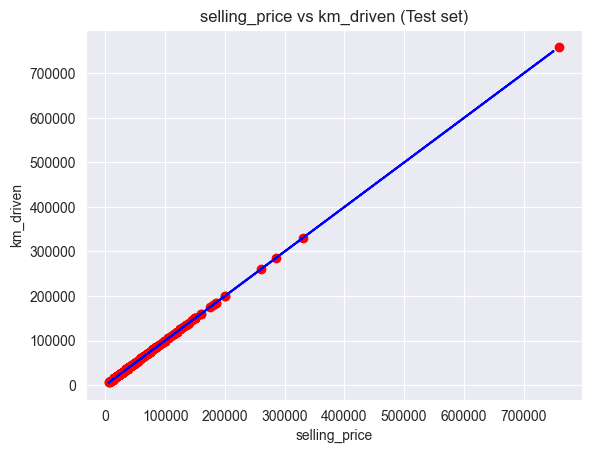

In [72]:
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_train[:,0], regressor.predict(X_train), color = 'blue')
plt.title('selling_price vs km_driven (Test set)')
plt.xlabel('selling_price')
plt.ylabel('km_driven')
plt.show()